In [84]:
import numpy as np
import matplotlib.pyplot as plt
import pyodbc
import pandas as pd


#print(eng_details.head())

import pyodbc
from sqlalchemy import create_engine
import urllib

params = urllib.parse.quote_plus(r'DRIVER={SQL Server};SERVER=*ServerName*;DATABASE=*DbName*;Trusted_Connection=yes')
conn_str = 'mssql+pyodbc:///?odbc_connect={}'.format(params)
engine = create_engine(conn_str)


# Flip the axis values to vertical and X Axis values 

([<matplotlib.axis.XTick at 0xf3789b0>,
 <a list of 14 Text xticklabel objects>)

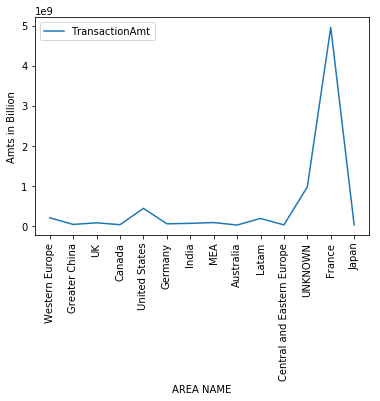

In [141]:
query = "SELECT Top 5000 [WW Area Name], SUM([ActualTransactionAmtCUS]) AS TransactionAmt FROM CPWorkedHoursFactCurrent CP JOIN vwFinanceGeographyDimension FG ON FG.[Finance Geo Original Key]=CP.FinanceGeoKey JOIN vwDateDimension DD ON DD.[Date Key]=cp.TransactionDateKey JOIN vwMCSEngagementDimension ED ON ED.[Engagement Key]=CP.[EngagementKey] WHERE DataSource IN ( 'Changepoint', 'SAP') GROUP BY  [WW Area Name]"
eng = pd.read_sql(query, engine).head(20)

eng.plot(y='TransactionAmt', x= 'WW Area Name')
plt.xlabel("AREA NAME")
plt.ylabel ("Amts in Billion")
plt.xticks(np.arange(len(eng['WW Area Name'])), eng['WW Area Name'], rotation =90)

In [144]:
eng.sort_values(["TransactionAmt"], ascending = True).head(15)

,WW Area Name,TransactionAmt
8,Australia,2.388559e+07
13,Japan,2.701538e+07
10,Central and Eastern Europe,2.815645e+07
3,Canada,3.252623e+07
1,Greater China,3.931184e+07
5,Germany,5.495402e+07
6,India,6.589288e+07
2,UK,7.953198e+07
7,MEA,8.597069e+07
9,Latam,1.883333e+08


([<matplotlib.axis.XTick at 0xedd77f0>, <matplotlib.axis.XTick at 0xedd7410>],
 <a list of 2 Text xticklabel objects>)

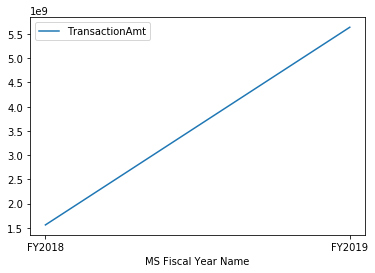

In [155]:
query = "SELECT Top 5000  [MS Fiscal Year Name], SUM([ActualTransactionAmtCUS]) AS TransactionAmt FROM CPWorkedHoursFactCurrent CP JOIN vwFinanceGeographyDimension FG ON FG.[Finance Geo Original Key]=CP.FinanceGeoKey JOIN vwDateDimension DD ON DD.[Date Key]=cp.TransactionDateKey JOIN vwMCSEngagementDimension ED ON ED.[Engagement Key]=CP.[EngagementKey] WHERE DataSource IN ( 'Changepoint', 'SAP') GROUP BY   [MS Fiscal Year Name]"
eng_details = pd.read_sql(query, engine).head(20)

eng_details
eng_details.plot(x='MS Fiscal Year Name')
plt.xticks(np.arange(len(eng_details['MS Fiscal Year Name'])), eng_details['MS Fiscal Year Name'])



KeyError: 'MS Fiscal Year Name'

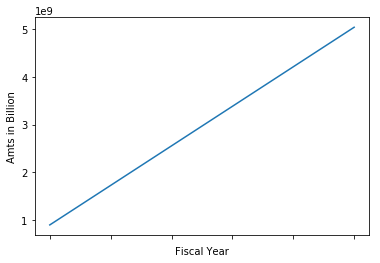

In [127]:
eng_details_fy = eng_details.groupby (["MS Fiscal Year Name"])["TransactionAmt"].sum()
eng_details_fy
eng_details_fy.plot(x = ['MS Fiscal Year Name'], y ='TransactionAmt')

plt.xlabel("Fiscal Year")
plt.ylabel ("Amts in Billion")
plt.xticks(np.arange(len(eng_details_fy['MS Fiscal Year Name'])), rotation =90)
#plt.xticks(np.arange(5, 5, step=0.2))

In [128]:
df= pd.read_csv("D:\\NQR - FY19\\PROD\\To Be Prod\\Matplot.csv")

In [129]:
df
import matplotlib.pyplot as plt
df

,Sales Location,Transaction Amount,Hours
0,USA,100000,10
1,Japan,80000,15
2,India,90000,20


([<matplotlib.axis.XTick at 0xea5b8b0>,
 <a list of 3 Text xticklabel objects>)

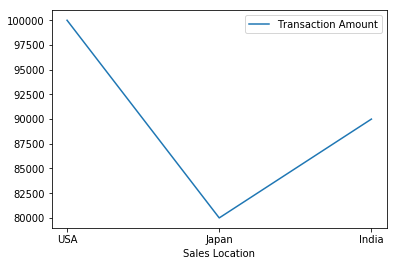

In [75]:
import numpy as np

df.plot(y='Transaction Amount', x= 'Sales Location')
plt.xticks(np.arange(len(df['Sales Location'])), df['Sales Location'])